In [37]:
import matplotlib.pyplot as plt
from scipy.stats import describe
import time
import numpy as np
import pandas as pd
import operator
from sympy import symbols, Eq, solve
from sympy import *
import cmath 
import math
from astropy.table import QTable, Table, Column
from astropy import units as u


Los parámetros a utilizar durante la primera simulación serán:
$$(a,\rho,\delta,\alpha,\beta,\lambda_0,T,c,x_0)=(0.7,0.5,2.5,2.0,1.5,0.7,400,1.5,10) $$

In [38]:
a=0.7
rho=0.5
delta=2.5
alpha=2.0
beta=1.5
gamma=1.0
lambda0=0.7
c=1.5
x_0=10
T=400

Cálculo de las soluciones a la ecuación generalizada de Lundberg

In [39]:
#etta estrella
x=Symbol('x')
etta_estrella=solve(1+delta*x-(beta/(beta-x)), x)
etta_estrella

[0.0, 1.10000000000000]

In [40]:
#Calculo de etta y v
x=Symbol('x')
etta=solve(1+delta*x-((gamma)/(gamma-(((-a*delta*x)+(rho*(1-(alpha/(alpha-x)))))/(-c))))*(beta/(beta-x)), x)

In [41]:
etta

[0.0,
 0.127027934770605 + 0.e-23*I,
 1.62616325166813 + 0.e-23*I,
 2.48966595641841 - 0.e-23*I]

In [42]:
v_=[]
for i in range(0,np.size(etta)):
    v1=((-a*delta*etta[i])+(rho*(1-(alpha/(alpha-etta[i])))))/(-c)
    v_.append(v1)
v_

[0,
 0.170806452347346 + 3.59117394127553e-23*I,
 3.34716673907353 + 1.57149928093833e-22*I,
 1.2098045863569 - 1.04478262460634e-22*I]

In [43]:
etta_0=abs(etta[1])
v_0=((-a*delta*etta_0)+(rho*(1-(alpha/(alpha-etta_0)))))/(-c)
v_0,etta_0

(0.170806452347346, 0.127027934770605)

Se procede a encontrar las cotas superiores para la probabilidad de ruina. 

In [45]:
#Cotas Superior
bound1=[]
bound2=[]
for i in lambdaa:
    bound1_1=round(exp(etta_0*i)*exp(-v_0*x_0),4)
    bound1.append(round(bound1_1*100,4))
    bound2_1=round(((gamma-v_0)*exp(etta_0*i)*exp(-v_0*x_0))/(gamma),4)
    bound2.append(round(bound2_1*100,4))
    
print(bound1,bound2)

[20.58, 23.36, 26.53, 30.12, 34.2, 38.83, 44.09, 50.07, 56.85, 64.55, 73.29, 83.22] [17.06, 19.37, 22.0, 24.98, 28.36, 32.2, 36.56, 41.51, 47.14, 53.52, 60.77, 69.0]


In [46]:
t = Table([lambdaa, bound1, bound2], names=('Lambda', 'Up Bound 1 (%)', 'Up Bound 2 (%)'))
t

Lambda,Up Bound 1 (%),Up Bound 2 (%)
float64,float64,float64
1.0,20.58,17.06
2.0,23.36,19.37
3.0,26.53,22.0
4.0,30.12,24.98
5.0,34.2,28.36
6.0,38.83,32.2
7.0,44.09,36.56
8.0,50.07,41.51
9.0,56.85,47.14


Gráfica de las cotas de la probabiidad de ruina

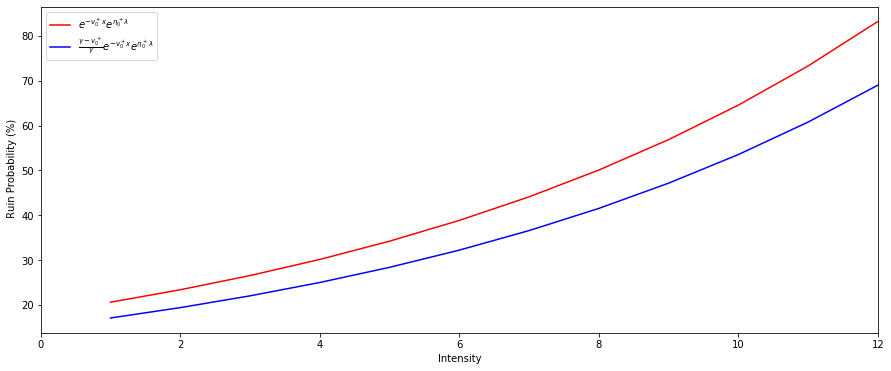

In [47]:
plt.figure(figsize=(15,6))
plt.plot(lambdaa,bound1,label='Up Bound 1',color='red')
plt.plot(lambdaa,bound2, color='blue', label='Up Bound 2')
#plt.plot(lambdaa,PP,color='green',label='Simulated Ruin Probability')
plt.xlabel('Intensity')
plt.ylabel(' Ruin Probability (%)')
plt.xlim(0,np.max(lambdaa))
plt.legend([r'$e^{-v_0^+ x}e^{\eta_0^+ \lambda}$',r'$\frac{\gamma - v_0^+}{\gamma}e^{-v_0^+ x}e^{\eta_0^+ \lambda}$'])
#plt.savefig("cotas.jpg", bbox_inches='tight')

Bajo la nueva medida se cambian los parámetros de la siguiente manera

In [48]:
a2=round((1+delta*etta_0)*a,4)
c2=c
delta2=delta
rho2=round((alpha*rho)/(alpha-etta_0),4)
gamma2=round(gamma-v_0,4)
beta2=round((beta-etta_0)/(1+delta*etta_0),4)
alpha2=round((alpha-etta_0)/(1+delta*etta_0),4)
lambda2=round((1+delta*etta_0)*lambda0,4)
m_0=round(etta_0/(etta_0*delta+1),4)
phi=round((gamma -v_0)/gamma,4)
vector1=['a2','c2','delta2','rho2','gamma2','beta2','alpha2','lambda2','etta_0','v_0','m_0','phi']
vector2=[a2,c2,delta2,rho2,gamma2,beta2,alpha2,lambda2,etta_0,v_0,m_0,phi]
new_values= Table([vector1, vector2], names=('Parameters', 'Values'))
new_values

Parameters,Values
str7,object
a2,0.9223
c2,1.5
delta2,2.5
rho2,0.5339
gamma2,0.8292
beta2,1.042
alpha2,1.4215
lambda2,0.9223
etta_0,0.127027934770605


La probabilidad de ruina será detemrinada bajo el cambio de medida como:

In [49]:
def simulation3(a,rho,delta,alpha,beta,lambda0,T):
    T0=0
    Nt=[]
    Nt.append(0)
    E=(-1/rho)*(np.log(np.random.rand()))
    d1=1+((delta*np.log(np.random.rand()))/(lambda0-a))
    lambdat=[]
    Ti=[]
    size=[]
    sizeSJ=[]
    sizeEJ=[]
    if d1>0:
        S1=(-np.log(d1))/delta
        S2=(-np.log(np.random.rand()))/a
        S= min(S1,S2)
    else:
        S2=(-np.log(np.random.rand()))/a
        S=S2
    Ti.append(T0+min(S,E))
    lambdamenos=a+(lambda0-a)*np.exp(-delta*(Ti[0]-T0))
    if S<E:
        SJ=(-1/beta)*np.log(np.random.rand())
        lambdat.append(lambdamenos+SJ)
        sizeSJ.append(SJ)
        N=1
    else:
        EJ=(-1/alpha)*np.log(np.random.rand())
        lambdat.append(lambdamenos+EJ)
        sizeEJ.append(EJ)
        N=0
    Nt[0]=N
    i=1
    Tx=Ti[-1]
    while Tx<T:
        E=(-1/rho)*(np.log(np.random.rand()))
        d1=1+((delta*np.log(np.random.rand()))/lambdat[i-1]-a)
        if d1>0:
            S1=(-np.log(d1))/delta
            S2=(-np.log(np.random.rand()))/a
            S= min(S1,S2)
        else:
            S2=(-np.log(np.random.rand()))/a
            S=S2
        Tx=Ti[i-1]+min(S,E)
        if Tx>T:
            break
        Ti.append(Tx)
        
        if S<E:
            SJ=(-1/beta)*np.log(np.random.rand())
            lambdat.append(lambdamenos+SJ)
            sizeSJ.append(SJ)
            N=1+N
        else:
            EJ=(-1/alpha)*np.log(np.random.rand())
            lambdat.append(lambdamenos+EJ)
            sizeEJ.append(EJ)
            N=0+N
        Nt.append(N)
        i=i+1
        if i==1000000:
            break
    return Ti,Nt,N,lambdat,sizeSJ,sizeEJ

In [50]:
def ruina_ok(a,rho,delta,alpha,beta,gamma,lambda0,T,x_0,c,sim):
    initial=0
    i=0
    ruinas=[]
    while initial<sim:
        Ti,Nt,N,lambdat,sizeSJ,sizeEJ=simulation3(a,rho,delta,alpha,beta,lambda0,T)
        Nt_final=[]
        z=[]
        while i <(len(Nt)):
            y=np.random.exponential(scale=1/gamma)
            z.append(y)
            if i==0:
                h=Nt[0]

            else:
                h=Nt[i]-Nt[i-1]
            Nt_final.append(h)    
            i=i+1
            if i ==10000000:
                break
        Ti_S = list(map(operator.mul, Ti, Nt_final))
        z_S = list(map(operator.mul, z, Nt_final))
        X_t=[]
        j=0
        
        while i<len(Ti):
            xt=x_0+c*(Ti[j])-np.cumsum(z_S)[j]
            X_t.append(xt)
            j=j+1
            if j==2000000:
                break
        ruina1=[]
        for number in X_t:
            if number <0:
                ruina1.append(1)
                break
            else:
                ruina1.append(0)
        ruinas.append(lambdat[len(ruina1)-1])
        initial=initial+1
        
        
    return ruinas

Se realizarán 10000 simulaciones para el cálculo del valor esperado condicionado a $X_0=0$

In [51]:
start=time.time()
x_0=0
sim=10000
ruinas=ruina_ok(a2,rho2,delta2,alpha2,beta2,gamma2,lambda2,T,x_0,c2,sim)
end=time.time()
print(f"Runtime of the program is {end - start}")

C:\Users\hsrc_\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


Runtime of the program is 105.33378958702087


Cálculo de cada uno de los términos para encontrar la probabilidad de ruina en la nueva medida.

In [52]:
start=time.time()
x=x_0
term1=(rho2*(alpha2-beta2))/(delta2*(alpha2-beta2)+1)
term2=(1/delta2)*(a2+(rho2/(delta2*(alpha2-beta2)+1)))
term3=(delta2*beta2-1)/delta2
term4=(((a2*delta2)+(rho2/(alpha2+m_0)))/(delta2-(1/(beta2+m_0))))
expected1=((alpha2/(alpha2-m_0))**(term1))*((term3/(term3-m_0))**(term2))*exp(m_0*a2)
expected2=((alpha2/(alpha2+m_0))**(term1))*((term3/(term3+m_0))**(term2))*term4*exp(-m_0*a2)
expected3=((rho2/alpha2)+a2*delta2)/(delta2-(1/beta2))
expected5=np.mean(np.exp(np.dot(-m_0,ruinas)))
print(expected1,expected2,expected5)
end=time.time()
print(f"Runtime of the program is {end - start}")

1.19013345300042 1.39279049938020 0.845529518558074
Runtime of the program is 0.010520696640014648


Aproximación de la probabilidad de ruina bajo la nueva medida

In [53]:
C=((phi*(beta-etta_0))/(beta))*expected1*(((expected2/gamma2)-c2*expected5)/((expected3/gamma2)-c2))
prob2=C*exp(-v_0*x)
print(C,prob2)

0.620001704412243 0.620001704412243


Se realiza la simulación de la probabilidad de ruina en la nueva medida para distintos valores de la reserva inicial

In [54]:
start=time.time()
for x in range(4,32,2):
    C=((phi*(beta-etta_0))/(beta))*expected1*(((expected2/gamma2)-c2*expected5)/((expected3/gamma2)-c2))
    prob2=C*exp(-v_0*x)
    print(x,prob2)
end=time.time()
print(f"Runtime of the program is {end - start}")

4 0.313091793557924
6 0.222490301747200
8 0.158106776958374
10 0.112354348588947
12 0.0798416101428098
14 0.0567373029193420
16 0.0403188454842436
18 0.0286515082236688
20 0.0203604273294920
22 0.0144685926410349
24 0.0102817180417909
26 0.00730642768883194
28 0.00519211724685963
30 0.00368963913053479
Runtime of the program is 0.010002851486206055
